# Trader Interactive Interview Dataset Exploration

Please see here for [full](https://docs.google.com/presentation/d/1W-2Uc2k_2dTf9Y-x-4lHrymV54yJaDu16J1O7mKR8Qk/edit?usp=sharing) presentation

In [1]:
import pandas as pd
import numpy as np
from scipy import stats # for t-test

In [2]:
listing_data = pd.read_excel('Analyst Test File Nov 2021.xlsx', sheet_name = '2019 Listing Data')
leads_19 = pd.read_excel('Analyst Test File Nov 2021.xlsx', sheet_name='2019 Leads')

In [3]:
dealers = pd.read_excel('Analyst Test File Nov 2021.xlsx', sheet_name='Dealers')
categories = pd.read_excel('Analyst Test File Nov 2021.xlsx', sheet_name='Categories')

# 1. Understanding the dataset
## Data Columns

SRPs: Search Result Impressions - how many times a listing appears in a user search <br>
VDPs: Vehicle Detail Page - how many times a user clicks into a specific listing

In [4]:
listing_data.columns

Index(['MTH', 'DEALER_ID', 'LISTING_AD_ID', 'LISTING_NEW_USED',
       'LISTING_MANUFACTURER', 'LISTING_TYPE', 'DMA_NAME', 'REALM_NAME',
       'CUSTOMER_TYPE', 'INVENTORY', 'SRPS', 'VDPS', 'WEBREFERRALS', 'MAPS',
       'EMAIL'],
      dtype='object')

In [5]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204912 entries, 0 to 204911
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   MTH                   204912 non-null  int64 
 1   DEALER_ID             204912 non-null  int64 
 2   LISTING_AD_ID         204912 non-null  int64 
 3   LISTING_NEW_USED      204912 non-null  object
 4   LISTING_MANUFACTURER  204569 non-null  object
 5   LISTING_TYPE          204912 non-null  object
 6   DMA_NAME              204912 non-null  object
 7   REALM_NAME            204912 non-null  object
 8   CUSTOMER_TYPE         204912 non-null  object
 9   INVENTORY             204912 non-null  int64 
 10  SRPS                  204912 non-null  int64 
 11  VDPS                  204912 non-null  int64 
 12  WEBREFERRALS          204912 non-null  int64 
 13  MAPS                  204912 non-null  int64 
 14  EMAIL                 204912 non-null  int64 
dtypes: int64(9), obje

In [6]:
leads_19.columns

Index(['MONTH', 'DEALER_ID', 'PHONECALLS', 'TEXTS', 'CHATS'], dtype='object')

In [7]:
leads_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MONTH       1233 non-null   int64
 1   DEALER_ID   1233 non-null   int64
 2   PHONECALLS  1233 non-null   int64
 3   TEXTS       1233 non-null   int64
 4   CHATS       1233 non-null   int64
dtypes: int64(5)
memory usage: 48.3 KB


In [8]:
dealers.columns

Index(['DEALER_ID', 'COMPANY_NAME'], dtype='object')

In [9]:
dealers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DEALER_ID     125 non-null    int64 
 1   COMPANY_NAME  124 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [10]:
categories.columns

Index(['LISTING_AD_ID', 'CATEGORY_NAME'], dtype='object')

In [11]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52429 entries, 0 to 52428
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LISTING_AD_ID  52429 non-null  int64 
 1   CATEGORY_NAME  52428 non-null  object
dtypes: int64(1), object(1)
memory usage: 819.3+ KB


## Data Shape
#### LISTING AD ID

In [12]:
print('ABOUT THE LISTING AD ID:\nThere are {} number of rows in listing data table. {} number of rows in categories table.\n{} number of listing ad id in listing_data table, {} number of listing ad id in category table.'.format(listing_data.shape[0], categories.shape[0], listing_data['LISTING_AD_ID'].nunique(), categories['LISTING_AD_ID'].nunique()))

ABOUT THE LISTING AD ID:
There are 204912 number of rows in listing data table. 52429 number of rows in categories table.
59825 number of listing ad id in listing_data table, 52429 number of listing ad id in category table.


#### makes sense that the number of listing and number of rows in the number of listing is not accurate because this query also include month. However, the number of ad id in the listing table is lower than the category table, which means that there are discrepency between the two tables.

In [13]:
unique_ad_id = list(categories['LISTING_AD_ID'].unique())
discrepency = listing_data[~listing_data['LISTING_AD_ID'].isin(unique_ad_id)].sort_values('LISTING_AD_ID')
discrepency

,MTH,DEALER_ID,LISTING_AD_ID,LISTING_NEW_USED,LISTING_MANUFACTURER,LISTING_TYPE,DMA_NAME,REALM_NAME,CUSTOMER_TYPE,INVENTORY,SRPS,VDPS,WEBREFERRALS,MAPS,EMAIL
171325,1,2980528,119744068,N,RAM,STANDARD,atlanta,Commercial Truck,DEALER,1,0,0,0,0,0
135550,1,2886784,120977632,N,CHEVROLET,STANDARD,atlanta,Commercial Truck,DEALER,1,44,2,0,0,0
98819,1,2937876,121943303,U,KENWORTH,STANDARD,atlanta,Commercial Truck,DEALER,1,0,0,0,0,0
74987,1,2964040,122512970,N,HINO,STANDARD,atlanta,Commercial Truck,DEALER,1,0,0,0,0,0
128152,1,2943150,122608726,U,FREIGHTLINER,STANDARD,atlanta,Commercial Truck,DEALER,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189417,12,0,5010825187,U,FORD,STANDARD,atlanta,Commercial Truck,PRIVATE PARTY,1,679,19,0,0,0
199857,12,0,5010825237,U,FORD,STANDARD,atlanta,Commercial Truck,PRIVATE PARTY,1,662,26,0,0,0
203548,12,2891146,5010825279,U,FREIGHTLINER,STANDARD,atlanta,Commercial Truck,DEALER,1,5,1,0,0,0
33610,12,0,5010830310,U,GMC,STANDARD,atlanta,Commercial Truck,PRIVATE PARTY,1,208,8,0,0,0


In [14]:
discrepency.to_csv('listing_data_discrepency_missing_category.csv')

#### not quite sure what's the discrepency, exporting this dataset for assessment later.
Might have to check how the data is exported and what is causing this discrepency.

#### DEALER ID

In [15]:
print('ABOUT THE DEALER TABLE: \nThere are {} number of dealers in the dealer table, {} number of rows in dealer table;\nThere are {} number of dealers in leads_19 table, {} number of dealers in the listing table'.format(dealers['DEALER_ID'].nunique(), dealers.shape[0], leads_19['DEALER_ID'].nunique(), listing_data['DEALER_ID'].nunique()))

ABOUT THE DEALER TABLE: 
There are 120 number of dealers in the dealer table, 125 number of rows in dealer table;
There are 121 number of dealers in leads_19 table, 120 number of dealers in the listing table


#### looks like the dealers table has some discrepancy

In [16]:
dup_dealers = dealers['DEALER_ID'].value_counts().to_frame()
dup_dealers = list(dup_dealers[dup_dealers['DEALER_ID'] >1].index)
dealers[dealers['DEALER_ID'].isin(dup_dealers)].sort_values('DEALER_ID')

,DEALER_ID,COMPANY_NAME
4,748306,Rush Truck Centers - Atlanta
20,748306,Rush Truck Center - Atlanta
5,748340,Rush Truck Centers - Smyrna
95,748340,Rush Truck Center - Smyrna
72,2961694,Bill Holt Chevrolet
92,2961694,Bill Holt Chevrolet of Blue Ridge
39,2964040,Rush Truck Center - Doraville
112,2964040,Rush Truck Centers - Doraville
29,5000002945,Nacarato Truck Center - Atlanta
71,5000002945,Nacarato Volvo Trucks - Atlanta


#### Looks like there are duplicate records. The second row will be removed. #datacleaning

In [17]:
# removing records

dealers.drop_duplicates(subset=['DEALER_ID'], keep='first', inplace=True)
print('New number of rows in dealers table: {}'.format(dealers.shape[0]))

New number of rows in dealers table: 120


In [18]:
leads_19[~leads_19['DEALER_ID'].isin(dealers['DEALER_ID'])]

,MONTH,DEALER_ID,PHONECALLS,TEXTS,CHATS
771,3,2636324,0,0,0


#### This dealer: 2636324 is not in the dealer dataset, I believe we can drop it since there are 0 phone calls, 0 text, and 0 chats for this dealer. Maybe it's a test data. #datacleaning

In [19]:
# dropping the row above for invalid dealer_id

leads_19 = leads_19[leads_19['DEALER_ID'].isin(dealers['DEALER_ID'])]

#### MONTHS

In [20]:
print('There are {} months in leads_19, {} months in listing data.'.format(leads_19['MONTH'].nunique(), listing_data['MTH'].nunique()))

There are 12 months in leads_19, 12 months in listing data.


#### Months field looks good.

## Data Values

In [21]:
def nonint_summary(df, pk):
    for col in df.select_dtypes(exclude='int64').columns:
        print('--------------- {} ---------------'.format(col))
        print('Number of unique values in {} column: {}'.format(col, df[col].nunique()))
        print(df[col].unique())
        holder = df.groupby(col).agg({pk: 'count'}).sort_values(by=pk, ascending=False)
        holder['percent_total'] = round(holder[pk]/holder[pk].sum(), 2)
        print(holder.head(10))
        print('\n')

In [22]:
nonint_summary(listing_data, 'LISTING_AD_ID')

--------------- LISTING_NEW_USED ---------------
Number of unique values in LISTING_NEW_USED column: 2
['N' 'U']
                  LISTING_AD_ID  percent_total
LISTING_NEW_USED                              
U                        105184           0.51
N                         99728           0.49


--------------- LISTING_MANUFACTURER ---------------
Number of unique values in LISTING_MANUFACTURER column: 209
['CHEVROLET' 'RKI' 'RAM' 'NISSAN' 'INTERNATIONAL' 'FREIGHTLINER' 'FORD'
 'PETERBILT' 'MITSUBISHI FUSO' 'WESTMOR' 'KENWORTH' 'GMC' 'VOLVO'
 'UTILITY' 'ISUZU' 'HEIL' 'HINO' 'KALMAR' 'OTHER' 'IC' 'TOYOTA' 'WELDIT'
 'GREAT DANE' 'EAGLE' 'MACK' 'JAC' 'DIAMOND' 'DODGE' 'MORGAN'
 'WESTERN STAR' nan 'POLAR TANK TRAILER' 'STE' 'IHC' 'THOMAS' 'TENNANT'
 'PACE' 'BLUE BIRD BUS' 'FRUEHAUF' 'GRANDE WEST' 'BEALL' 'LOOK' 'US TRUCK'
 'STARCRAFT' 'ELKHART COACH' 'MERCEDES-BENZ' 'CAIO' 'OTHER TRAILERS'
 'AUTOCAR' 'DORSEY' 'STERLING' 'TICO' 'VIM' 'KNAPHEIDE' 'SUPREME'
 'LUBBOCK' 'OTTAWA' 'TRAILMOB

### Notes -- listing_data --categorical:
- Atlanta was the only city in the dataset.
- Only Commercial Truck is provided in the dataset
- 99% of listing are listed from a dealer.
- FORD, RAM, FREIGHTLINER, CHEVROLET TAKE UP 66% of the listings.
- 89% of the listing are standard listing_type.
- New and Used listings are about an even split.

In [23]:
# get descriptive statistics of numerical data types
listing_data_numerical = ['SRPS', 'VDPS','INVENTORY','WEBREFERRALS', 'MAPS', 'EMAIL']
listing_data[listing_data_numerical].describe()

,SRPS,VDPS,INVENTORY,WEBREFERRALS,MAPS,EMAIL
count,204912.000000,204912.000000,204912.0,204912.000000,204912.000000,204912.000000
mean,348.916696,6.529422,1.0,0.189520,0.032024,0.041984
std,1088.600211,53.916622,0.0,0.890162,0.293802,0.325571
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,41.000000,0.000000,1.0,0.000000,0.000000,0.000000
75%,254.000000,3.000000,1.0,0.000000,0.000000,0.000000
max,52891.000000,12691.000000,1.0,63.000000,39.000000,31.000000


In [24]:
listing_data.groupby('MTH').agg({'DEALER_ID': 'count', 'LISTING_AD_ID': 'count', 'SRPS':[np.mean, 'sum'], 'VDPS': [np.mean, 'sum'], 'WEBREFERRALS': [np.mean, 'sum'], 'MAPS': [np.mean, 'sum'], 'EMAIL':[np.mean, 'sum']})

DEALER_ID LISTING_AD_ID        SRPS                VDPS          \
        count         count        mean      sum       mean     sum   
MTH                                                                   
1       16921         16921  410.343301  6943419   6.706459  113480   
2       17394         17394  361.485512  6287679   5.900080  102626   
3       17738         17738  377.472601  6695609   6.113936  108449   
4       17716         17716  332.519643  5890918   5.655170  100187   
5       17035         17035  311.856472  5312475   5.882184  100203   
6       16923         16923  316.533652  5356699   5.504993   93161   
7       17405         17405  267.717323  4659620   5.419190   94321   
8       23153         23153  227.754891  5273209   5.142746  119070   
9       15431         15431  353.794958  5459410   7.219493  111404   
10      15390         15390  387.627940  5965594   8.013515  123328   
11      15009         15009  425.797255  6390791   8.117396  121834   
12      14797         14797  490.761303  7261795  10.130026  149894   

    WEBREFERRALS            MAPS          EMAIL       
            mean   sum      mean  sum      mean  sum  
MTH                                                   
1       0.261273  4421  0.051829  877  0.036759  622  
2       0.223008  3879  0.045245  787  0.037714  656  
3       0.212256  3765  0.051810  919  0.045721  811  
4       0.176846  3133  0.036069  639  0.043689  774  
5       0.157910  2690  0.039448  672  0.040974  698  
6       0.168114  2845  0.045205  765  0.039355  666  
7       0.168630  2935  0.030681  534  0.033841  589  
8       0.146158  3384  0.023021  533  0.033646  779  
9       0.190137  2934  0.011859  183  0.044715  690  
10      0.231254  3559  0.012736  196  0.048993  754  
11      0.195683  2937  0.013858  208  0.046839  703  
12      0.159019  2353  0.016828  249  0.058187  861

### NOTES --listing_data --numerical:
- SRPs and VDP has a very long right tail, highly skewed to the right. There are a lot of outliers that are on the right side.
- inventory count is 1 in this dataset.
- Web referrals, Maps, and email also has a very long right tail, more than 75% of listings have 0 webreferrals, maps, or email.
- max dealer and listing month: August
- max SRPS: December
- max VDPS: January
- max web referrals: Jan
- max maps: March
- max email: December

In [25]:
nonint_summary(dealers, 'DEALER_ID')

--------------- COMPANY_NAME ---------------
Number of unique values in COMPANY_NAME column: 101
['Custom Truck One Source- Atlanta' 'Ryder Used Trucks in Atlanta'
 'Alliance Bus Group' 'Jordan Truck Sales Inc'
 'Rush Truck Centers - Atlanta' 'Rush Truck Centers - Smyrna'
 'MHC Kenworth - Gainesville' 'PENSKE USED TRUCKS' 'TOWN CENTER NISSAN'
 'Carl Black Chevrolet Buick GMC' 'Werner Fleet Sales-Georgia'
 'International Used Truck Center of Atlanta' 'Arrow Truck Sales Atlanta'
 'Hayes Chrysler' 'Carriage Nissan'
 'Bellamy Strickland Commercial Truck Sales' 'Gwinnett Place Nissan'
 'Nash Chevrolet' 'GWINNETT CHRYSLER DODGE JEEP RAM'
 'Forsyth Truck Sales Inc' 'Ryder Trucks Wholesale'
 'Landmark Dodge, Chrysler, Jeep' 'Gainesville Truck Center'
 'Hackett Sales,Inc.' 'MHC Kenworth - Atlanta' 'Rick Hendrick Chevrolet'
 'Peach State Truck Centers, LLC' 'Nacarato Truck Center - Atlanta'
 'Ramey Motors' 'Hennessy Of Southlake' 'The Truck & Trailer Connection'
 'Rush Truck Center - Doraville' 

In [26]:
dealers[dealers['COMPANY_NAME'] == 'PENSKE USED TRUCKS']

,DEALER_ID,COMPANY_NAME
7,2967282,PENSKE USED TRUCKS
10,5000001774,PENSKE USED TRUCKS
31,2967288,PENSKE USED TRUCKS
32,2967248,PENSKE USED TRUCKS
33,2967238,PENSKE USED TRUCKS
34,2967244,PENSKE USED TRUCKS
36,3005868,PENSKE USED TRUCKS
38,5000001795,PENSKE USED TRUCKS
41,3002226,PENSKE USED TRUCKS
49,2967232,PENSKE USED TRUCKS


### NOTES --dealer --categorical:
- Penske Used Trucks has 16 different dealer_id

In [27]:
nonint_summary(categories, 'LISTING_AD_ID')

--------------- CATEGORY_NAME ---------------
Number of unique values in CATEGORY_NAME column: 137
['Pickup Truck' 'Car Carrier' 'Box Truck - Straight Truck' 'Cargo Van'
 'Conventional - Sleeper Truck' 'Flatbed Truck'
 'Utility Truck - Service Truck' 'Cab Chassis' 'Refrigerated Truck' 'Van'
 'Cutaway-Cube Van' 'Stepvan' 'Dump Truck' 'Cabover Truck - COE'
 'Tag-A-Long Trailer' 'Rollback Tow Truck' 'Bucket Truck - Boom Truck'
 'Landscape Truck' 'Fuel Tank Trailer' 'Reefer Van' 'Hauler' 'Bus'
 'Chipper Truck' 'Pup Trailer' 'Western Hauler' 'Tractor' 'Passenger Van'
 'Conventional - Day Cab' 'Mechanics Truck' 'Other Truck'
 'Dry Van Trailer' 'Reefer/Refrigerated Van' 'Reefer/Refrigerated Truck'
 'Flatbed Dump' 'Landscape Trailer' 'Yard Spotter Truck' 'Spray Truck'
 'Plumber Service Truck' 'Tanker Truck' 'Other Trailer' 'Contractor Truck'
 'Stake Bed' 'Dually' 'Garbage Truck' 'Roll Off Truck' 'Knucklebooms'
 'Vacuum Truck' 'Enclosed Trailer' 'Wrecker Tow Truck' 'Tanker Trailer'
 'Lowboy Tra

### NOTES --categories --categorical:
- 40% of Commercial Truck with categories are Pickup Truck

# 2. Data Cleaning and Data Transformation

Previously, we've removed dealer with duplicate rows, and dropped the dealer_id with 0 phone calls, 0 text, and 0 chats. (see #datacleaning for code that cleaned it)

### create a summarized view of first month and last month

There are multiple dealer under one listing_ad_id?

There are 287 listings that have the multiple dealer_id, multiple company name (287 that have more than one dealer_id in the same listing_ad_id), for example PENSKE_USED_TRUCKS.
Even when we're grouping it by company name, there are still 73 listings that have multiple dealer name.

In [28]:
listing_data[listing_data['LISTING_AD_ID'] == 120781521]

,MTH,DEALER_ID,LISTING_AD_ID,LISTING_NEW_USED,LISTING_MANUFACTURER,LISTING_TYPE,DMA_NAME,REALM_NAME,CUSTOMER_TYPE,INVENTORY,SRPS,VDPS,WEBREFERRALS,MAPS,EMAIL
42809,1,2967238,120781521,U,FREIGHTLINER,STANDARD,atlanta,Commercial Truck,DEALER,1,301,0,0,0,0
68936,5,3002226,120781521,U,FREIGHTLINER,STANDARD,atlanta,Commercial Truck,DEALER,1,82,0,0,0,0
83331,2,2967238,120781521,U,FREIGHTLINER,STANDARD,atlanta,Commercial Truck,DEALER,1,230,1,0,0,0
111800,3,2967238,120781521,U,FREIGHTLINER,STANDARD,atlanta,Commercial Truck,DEALER,1,293,0,0,0,0
120060,4,2967238,120781521,U,FREIGHTLINER,STANDARD,atlanta,Commercial Truck,DEALER,1,63,0,0,0,0
182261,4,3002226,120781521,U,FREIGHTLINER,STANDARD,atlanta,Commercial Truck,DEALER,1,170,0,0,0,0


In [29]:
# categories can be joined to listing data using listing_ad_id

listing_data = listing_data.merge(right=categories, on='LISTING_AD_ID', how='left')
listing_data = listing_data.merge(right=dealers, on='DEALER_ID', how='left')

In [30]:
def return_first(x):
    return list(x.unique())[0]

def return_last(x):
    return list(x.unique())[-1]

def return_all(x):
    return list(x.unique())

listing = listing_data.groupby('LISTING_AD_ID').agg({
    'COMPANY_NAME':return_first, 
    'DEALER_ID':return_first, 
    'LISTING_NEW_USED':return_first,
    'LISTING_MANUFACTURER': return_all,
    'LISTING_TYPE':return_all, 
    'CATEGORY_NAME': return_all,
    'MTH': return_all,
    'SRPS':'sum', 'VDPS':'sum', 'WEBREFERRALS':'sum', 'MAPS':'sum', 'EMAIL':'sum'})

In [31]:
# create a view of average month length

listing['MTH_LENGTH'] = listing['MTH'].apply(lambda l: max(l)-min(l))

In [32]:
listing.describe()

,DEALER_ID,SRPS,VDPS,WEBREFERRALS,MAPS,EMAIL,MTH_LENGTH
count,5.982500e+04,59825.000000,59825.000000,59825.000000,59825.000000,59825.000000,59825.000000
mean,8.761659e+08,1195.106026,22.364513,0.649143,0.109687,0.143803,2.123761
std,1.898284e+09,4805.767079,253.395261,3.213833,0.860606,0.983889,2.324136
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.751518e+06,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.965902e+06,66.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.019410e+06,547.000000,6.000000,0.000000,0.000000,0.000000,3.000000
max,5.000004e+09,209033.000000,55913.000000,200.000000,124.000000,92.000000,11.000000


# 3. Data Story

Does premium or featured listing get more exposure and sell faster?
- How much more interaction and SRPS, and VDPS improve after listing premium/featured?

In [33]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [34]:
listing['LISTING_TYPE_STR'] = listing['LISTING_TYPE'].astype(str)

In [35]:
listing.head()

,COMPANY_NAME,DEALER_ID,LISTING_NEW_USED,LISTING_MANUFACTURER,LISTING_TYPE,CATEGORY_NAME,MTH,SRPS,VDPS,WEBREFERRALS,MAPS,EMAIL,MTH_LENGTH,LISTING_TYPE_STR
LISTING_AD_ID,,,,,,,,,,,,,,
97576959,Clark Truck Sales,2937876,U,[FORD],"[STANDARD, PREMIUM]",[Cab Chassis],"[8, 2, 5, 6, 10, 3, 9, 12, 11, 7, 4, 1]",23854,334,3,4,1,11,"['STANDARD', 'PREMIUM']"
97587758,Clark Truck Sales,2937876,U,[FORD],"[STANDARD, PREMIUM]",[Flatbed Truck],"[8, 5, 10, 3, 12, 6, 7, 11, 9, 4, 2, 1]",26178,714,0,3,3,11,"['STANDARD', 'PREMIUM']"
97588164,Clark Truck Sales,2937876,U,[DODGE],[STANDARD],[Flatbed Truck],"[2, 10, 4, 5, 6, 1, 11, 9, 8, 7, 12, 3]",18169,2444,1,12,6,11,['STANDARD']
97588176,Clark Truck Sales,2937876,U,[FORD],[STANDARD],[Crane Truck],"[11, 4, 9, 3, 7, 1, 12, 2, 5, 10, 6, 8]",16173,476,0,2,2,11,['STANDARD']
97588954,Clark Truck Sales,2937876,U,[INTERNATIONAL],"[STANDARD, PREMIUM]",[Cab Chassis],"[4, 2, 11, 1, 7, 6, 3, 12, 9, 5, 8, 10]",13910,334,0,0,0,11,"['STANDARD', 'PREMIUM']"


In [36]:
listing.reset_index().groupby('LISTING_TYPE_STR').agg({'LISTING_AD_ID':'count', 'MTH_LENGTH':[np.mean, 'min', 'max', percentile(25), percentile(75)], 'SRPS':[np.mean, 'sum'], 'VDPS': [np.mean, 'sum'], 'WEBREFERRALS': [np.mean, 'sum'], 'MAPS': [np.mean, 'sum'], 'EMAIL':[np.mean, 'sum']}).sort_values(('LISTING_AD_ID', 'count'), ascending=False)

LISTING_AD_ID MTH_LENGTH  \
                                                           count       mean   
LISTING_TYPE_STR                                                              
['STANDARD']                                               52306   1.928039   
['STANDARD', 'PREMIUM']                                     3400   3.632941   
['PREMIUM', 'STANDARD']                                     2158   3.360982   
['FEATURED']                                                 223   1.336323   
['STANDARD', 'FEATURED']                                     186   3.295699   
['STANDARD', 'PREMIUM AND FEATURED']                         183   2.207650   
['PREMIUM AND FEATURED', 'STANDARD']                         173   2.514451   
['PREMIUM']                                                  154   1.038961   
['FEATURED', 'STANDARD']                                     139   2.798561   
['PREMIUM AND FEATURED']                                     119   2.672269   
['STANDARD', 'PREMIUM AND FEATURED', 'PREMIUM']              115   4.556522   
['STANDARD', 'PREMIUM', 'PREMIUM AND FEATURED']              112   4.607143   
['PREMIUM AND FEATURED', 'STANDARD', 'PREMIUM']               94   4.361702   
['PREMIUM', 'STANDARD', 'PREMIUM AND FEATURED']               88   5.954545   
['PREMIUM AND FEATURED', 'PREMIUM', 'STANDARD']               59   4.559322   
['PREMIUM', 'PREMIUM AND FEATURED', 'STANDARD']               43   5.209302   
['PREMIUM AND FEATURED', 'STANDARD', 'FEATURED']              27   5.592593   
['STANDARD', 'PREMIUM', 'FEATURED']                           24   5.750000   
['STANDARD', 'PREMIUM AND FEATURED', 'FEATURED']              22   5.636364   
['STANDARD', 'FEATURED', 'PREMIUM']                           18   5.055556   
['PREMIUM AND FEATURED', 'FEATURED', 'STANDARD']              12   5.000000   
['PREMIUM AND FEATURED', 'PREMIUM', 'STANDARD',...            12   7.250000   
['STANDARD', 'PREMIUM AND FEATURED', 'PREMIUM',...            11   7.090909   
['FEATURED', 'PREMIUM AND FEATURED', 'STANDARD']              11   5.000000   
['STANDARD', 'PREMIUM', 'PREMIUM AND FEATURED',...            10   5.500000   
['PREMIUM', 'STANDARD', 'PREMIUM AND FEATURED',...            10   6.700000   
['FEATURED', 'STANDARD', 'PREMIUM AND FEATURED']               9   5.666667   
['PREMIUM', 'PREMIUM AND FEATURED', 'STANDARD',...             9   6.444444   
['PREMIUM', 'PREMIUM AND FEATURED']                            9   2.111111   
['FEATURED', 'STANDARD', 'PREMIUM']                            9   4.888889   
['PREMIUM AND FEATURED', 'STANDARD', 'PREMIUM',...             8   6.500000   
['STANDARD', 'FEATURED', 'PREMIUM AND FEATURED']               7   7.428571   
['PREMIUM AND FEATURED', 'PREMIUM']                            7   2.000000   
['PREMIUM', 'STANDARD', 'FEATURED']                            6   5.666667   
['STANDARD', 'FEATURED', 'PREMIUM', 'PREMIUM AN...             5   6.800000   
['PREMIUM AND FEATURED', 'STANDARD', 'FEATURED'...             5   7.800000   
['FEATURED', 'PREMIUM', 'STANDARD']                            5   5.200000   
['STANDARD', 'PREMIUM', 'FEATURED', 'PREMIUM AN...             4   4.000000   
['STANDARD', 'FEATURED', 'PREMIUM AND FEATURED'...             4   4.000000   
['PREMIUM', 'FEATURED', 'STANDARD']                            4   3.000000   
['PREMIUM AND FEATURED', 'FEATURED', 'PREMIUM',...             4   7.250000   
['STANDARD', 'PREMIUM AND FEATURED', 'FEATURED'...             3   7.000000   
['FEATURED', 'STANDARD', 'PREMIUM AND FEATURED'...             2   3.500000   
['FEATURED', 'STANDARD', 'PREMIUM', 'PREMIUM AN...             2   7.000000   
['PREMIUM', 'FEATURED', 'STANDARD', 'PREMIUM AN...             2   6.000000   
['PREMIUM AND FEATURED', 'FEATURED', 'STANDARD'...             2   5.500000   
['PREMIUM AND FEATURED', 'FEATURED']                           2   3.000000   
['PREMIUM', 'STANDARD', 'FEATURED', 'PREMIUM AN...             2   3.500000   
['PREMIUM', 'PREMIUM A

In [37]:
listing['LISTING_TYPE_LENGTH'] = listing['LISTING_TYPE'].agg(lambda l: len(l))

In [38]:
df = listing[listing['LISTING_TYPE_LENGTH'] == 1]

In [39]:
df.describe()

,DEALER_ID,SRPS,VDPS,WEBREFERRALS,MAPS,EMAIL,MTH_LENGTH,LISTING_TYPE_LENGTH
count,5.280200e+04,52802.000000,52802.000000,52802.000000,52802.000000,52802.000000,52802.000000,52802.0
mean,8.933441e+08,516.142665,12.425590,0.313871,0.057630,0.088216,1.924624,1.0
std,1.912912e+09,1982.391785,255.693116,1.651575,0.710009,0.711201,2.168583,0.0
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.697334e+06,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2.965902e+06,41.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,3.019410e+06,282.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.0
max,5.000004e+09,93046.000000,55913.000000,129.000000,124.000000,39.000000,11.000000,1.0


In [40]:
df_summary = df.reset_index().groupby('LISTING_TYPE_STR').agg({'LISTING_AD_ID':'count', 'MTH_LENGTH':[np.mean,'sum', 'min', 'max', percentile(25), percentile(75)], 'SRPS':[np.mean, 'sum'], 'VDPS': [np.mean, 'sum'], 'WEBREFERRALS': [np.mean, 'sum'], 'MAPS': [np.mean, 'sum'], 'EMAIL':[np.mean, 'sum']}).sort_values(('LISTING_AD_ID', 'count'), ascending=False)
df_summary

LISTING_AD_ID MTH_LENGTH                  \
                                 count       mean     sum min max   
LISTING_TYPE_STR                                                    
['STANDARD']                     52306   1.928039  100848   0  11   
['FEATURED']                       223   1.336323     298   0   6   
['PREMIUM']                        154   1.038961     160   0   5   
['PREMIUM AND FEATURED']           119   2.672269     318   0   8   

                                                              SRPS            \
                         percentile_25 percentile_75          mean       sum   
LISTING_TYPE_STR                                                               
['STANDARD']                       0.0           3.0    454.429148  23769371   
['FEATURED']                       1.0           2.0   5480.941704   1222250   
['PREMIUM']                        0.0           2.0   3822.902597    588727   
['PREMIUM AND FEATURED']           1.0           5.0  14058.966387   1673017   

                                VDPS         WEBREFERRALS             MAPS  \
                                mean     sum         mean    sum      mean   
LISTING_TYPE_STR                                                             
['STANDARD']               10.687569  559024     0.311857  16312  0.057240   
['FEATURED']              189.026906   42153     0.183857     41  0.098655   
['PREMIUM']                68.844156   10602     1.246753    192  0.129870   
['PREMIUM AND FEATURED']  372.411765   44317     0.235294     28  0.058824   

                                   EMAIL        
                           sum      mean   sum  
LISTING_TYPE_STR                                
['STANDARD']              2994  0.070164  3670  
['FEATURED']                22  2.044843   456  
['PREMIUM']                 20  0.207792    32  
['PREMIUM AND FEATURED']     7  4.201681   500

In [41]:
def average_by_count(row, c):
    total = row[c]['sum']
    return total/row['LISTING_AD_ID']['count']

df_summary['MTH_LENGTH']['mean'] = df_summary.apply(lambda x: average_by_count(x, 'MTH_LENGTH'), axis=1)
df_summary['SRPS']['mean'] = df_summary.apply(lambda x: average_by_count(x, 'SRPS'), axis=1)
df_summary['VDPS']['mean'] = df_summary.apply(lambda x: average_by_count(x, 'VDPS'), axis=1)
df_summary['WEBREFERRALS']['mean'] = df_summary.apply(lambda x: average_by_count(x, 'WEBREFERRALS'), axis=1)
df_summary['MAPS']['mean'] = df_summary.apply(lambda x: average_by_count(x, 'MAPS'), axis=1)
df_summary['EMAIL']['mean'] = df_summary.apply(lambda x: average_by_count(x, 'EMAIL'), axis=1)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [42]:
col_show = ['LISTING_AD_ID', 'EMAIL']
df_summary[col_show]

LISTING_AD_ID     EMAIL      
                                 count      mean   sum
LISTING_TYPE_STR                                      
['STANDARD']                     52306  0.070164  3670
['FEATURED']                       223  2.044843   456
['PREMIUM']                        154  0.207792    32
['PREMIUM AND FEATURED']           119  4.201681   500

## from a quick scan, there's quite an improvement in terms of length, SRPs, VDPs, web referrals, maps, email, but is it significant between groups?

In [43]:
df['LISTING_TYPE'] = df['LISTING_TYPE'].apply(lambda x: x[0])

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
metrics = ['MTH_LENGTH', 'SRPS', 'VDPS','WEBREFERRALS', 'MAPS', 'EMAIL']
nonstandard_l = ['PREMIUM', 'FEATURED', 'PREMIUM AND FEATURED']

# loop through every metrics
for col in metrics:
    print('===========', col, '===========')
    standard = df[df['LISTING_TYPE'] == 'STANDARD'][col].to_numpy()
    premium = df[df['LISTING_TYPE'] == 'PREMIUM'][col].to_numpy()
    featured = df[df['LISTING_TYPE'] == 'FEATURED'][col].to_numpy()
    premiumfeatured = df[df['LISTING_TYPE'] == 'PREMIUM AND FEATURED'][col].to_numpy()
    
    alpha = 0.05
    
    # t-test for every listing category
    for i in nonstandard_l:
        print('STANDARD VS', i, ':')
        nonstandard = df[df['LISTING_TYPE'] == i][col].to_numpy()
        res = stats.ttest_ind(a=standard, b=nonstandard, equal_var=True)
        p = res.pvalue

        # interpret via p-value
        if p > alpha:
            print('{}: Accept null hypothesis that the means are equal. p-value: {}'.format(col, p))
        else:
            print('{}: Reject the null hypothesis that the means are equal. p-value: {}'.format(col, p))
        print('\n')
    print('\n')

=========== MTH_LENGTH ===========
STANDARD VS PREMIUM :
MTH_LENGTH: Reject the null hypothesis that the means are equal. p-value: 3.9004679838513895e-07


STANDARD VS FEATURED :
MTH_LENGTH: Reject the null hypothesis that the means are equal. p-value: 4.823746148387649e-05


STANDARD VS PREMIUM AND FEATURED :
MTH_LENGTH: Reject the null hypothesis that the means are equal. p-value: 0.00019076873283280005




=========== SRPS ===========
STANDARD VS PREMIUM :
SRPS: Reject the null hypothesis that the means are equal. p-value: 4.01106457721682e-138


STANDARD VS FEATURED :
SRPS: Reject the null hypothesis that the means are equal. p-value: 0.0


STANDARD VS PREMIUM AND FEATURED :
SRPS: Reject the null hypothesis that the means are equal. p-value: 0.0




=========== VDPS ===========
STANDARD VS PREMIUM :
VDPS: Reject the null hypothesis that the means are equal. p-value: 0.004583966112527468


STANDARD VS FEATURED :
VDPS: Reject the null hypothesis that the means are equal. p-value: 1.5

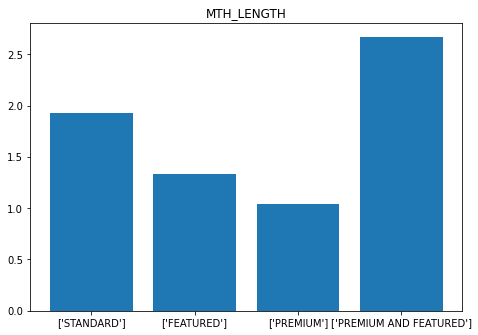

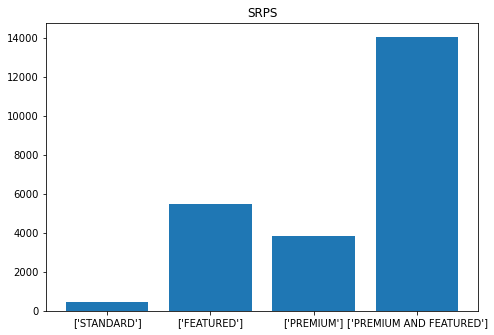

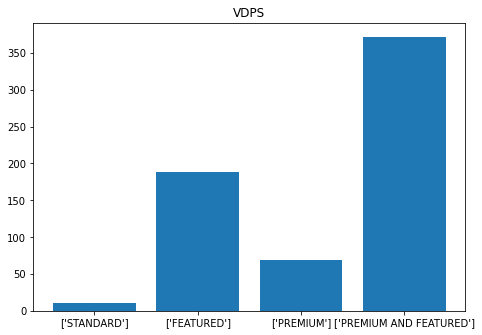

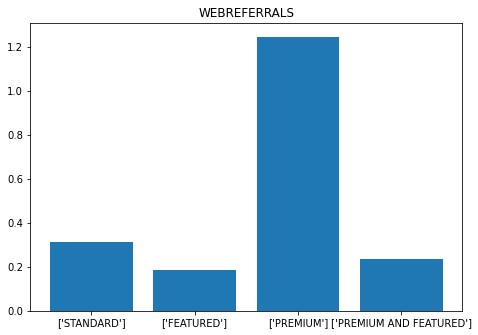

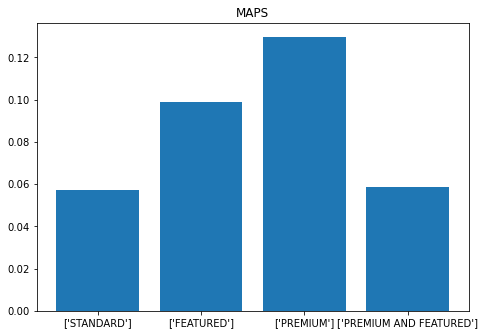

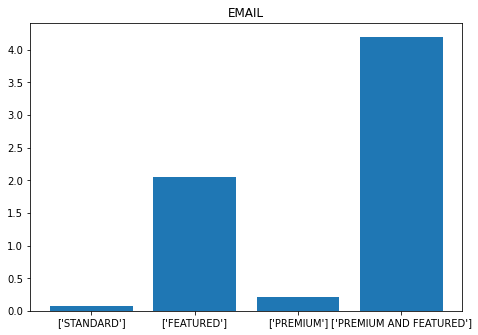

In [47]:
import matplotlib.pyplot as plt

for m in metrics:
    x = df_summary.index
    y = df_summary[m]['mean']
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x,y)
    plt.title(m)
    plt.show()